### 41개 어쩌구

In [2]:
from shapely.geometry import Polygon, LineString, Point
import pandas as pd
import os

import geopandas as gpd # GeoPandas(지오판다스)
# import rasterio
import shutil # shutil(shell utility, 쉘 유틸리티)
from glob import glob

import matplotlib.pyplot as plt

path = os.getcwd()
os.getcwd()


'c:\\Users\\picop\\panel-dask\\program\\total_program'

In [3]:
path_shp = glob(os.path.join(path,"data","pro1shp","CaseStudy_Result (2)","shp","*.shp",))[6]
base_shp = gpd.GeoDataFrame.from_file(path_shp,encoding = 'cp949')
base_shp['color_vec'] = 0

g_data = gpd.GeoDataFrame.from_file(os.path.join(path,"data","pro1shp","CaseStudy_Result (2)","KRF_ver3_LINE_Geumgang_m.shp",))
g_data = g_data.to_crs(base_shp.crs)
g_data = g_data.iloc[-13:,:]
g_data['color_vec'] = 0

ps_41_data = pd.read_csv(os.path.join(path,"data","03_DB_STP_Information_xy.csv"), encoding= 'cp949')
pred_data = pd.read_csv(os.path.join(path,"data","cal_data.csv"))[['STP명','방류구역농도(㎎/L)']]
pred_data.columns = [['STP_Name', 'b(mg/L)']]
ps_41_data['b(mg/L)'] = pred_data['b(mg/L)']

ps_41_data['X'] = ps_41_data['X'].astype(float)
ps_41_data['Y'] = ps_41_data['Y'].astype(float)
ps_41_data['geometry'] =  ps_41_data.apply(lambda row : Point([row['X'], row['Y']]), axis=1)
ps_41_data = gpd.GeoDataFrame(ps_41_data)
ps_41_data.crs = {'init':'epsg:5181'}
ps_41_data = ps_41_data.to_crs(base_shp.crs)
watersheds = set(ps_41_data['WS_M'])

print(watersheds)

c:\Users\picop\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


{'한강서울', '경안천', '미호천', '안성천', '갑천'}


In [4]:
ps_41_data.head()

,WS_M,STP_Name,STP_Population,EFFLUENTstp,FLOWups,DILUTION,Foc_susp,SUSPwater,X,Y,CLSS,PNU,b(mg/L),geometry
0,미호천,STP_진천,"33,408","12,076.60","104,563.40",9.66,0.1,4,244060.0,371142.0,정좌표,4.380000e+18,0.000009,POINT (244060.000 371142.000)
1,미호천,STP_증평,"37,188","19,662.50","80,784.00",5.11,0.1,4,250451.0,364846.0,정좌표,4.370000e+18,0.000012,POINT (250451.000 364846.000)
2,미호천,STP_청주,"684,137","250,979.40","625,968.00",3.49,0.1,4,235194.0,351714.0,정좌표,4.310000e+18,0.000024,POINT (235194.000 351714.000)
3,미호천,STP_조치원,"45,095","21,163.00","1,006,125.40",48.54,0.1,4,226894.0,343272.0,정좌표,3.610000e+18,0.000001,POINT (226894.000 343272.000)
4,갑천,STP_계룡,"42,304","15,962.20","21,600.00",2.35,0.1,4,225241.0,306149.0,정좌표,4.430000e+18,0.000035,POINT (225241.000 306149.000)


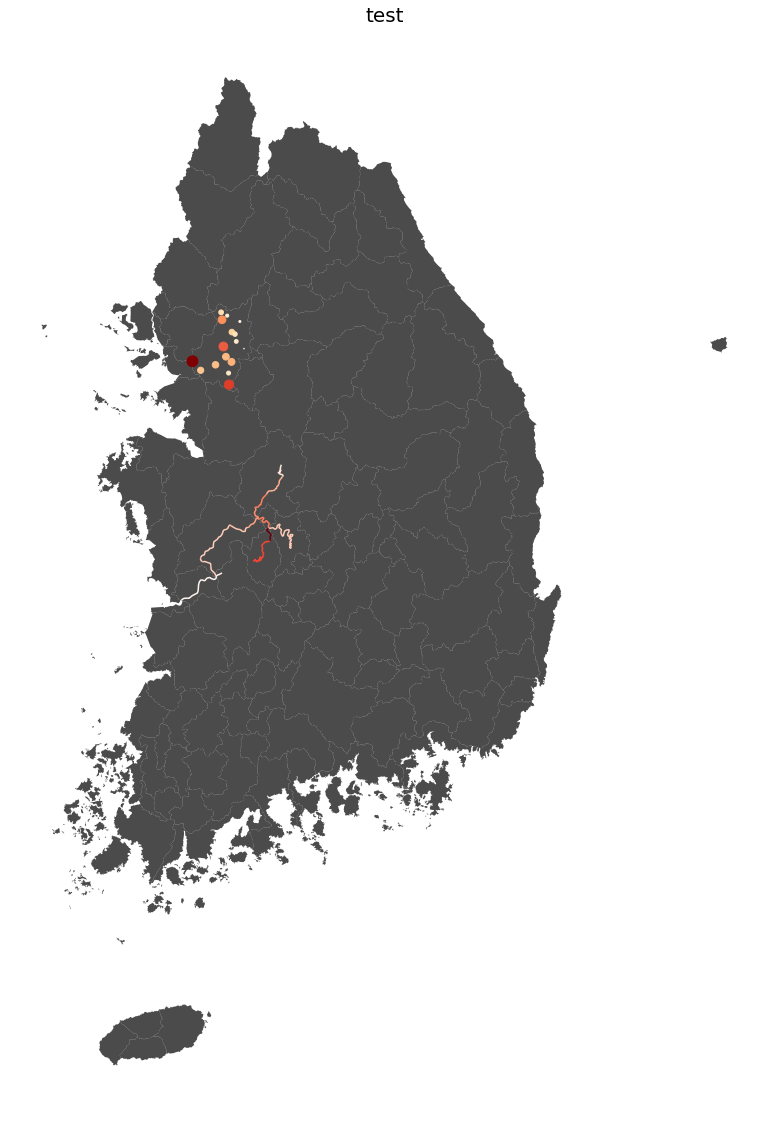

In [10]:
water_shed_ind = "한강서울"
point_set = ps_41_data[ps_41_data.WS_M == water_shed_ind]


ax = base_shp.plot(column="color_vec",figsize=(20,20), alpha=0.7, cmap='gray')
# ps_41_data.plot(ax = ax, marker='o',color = 'white', markersize=ps_41_data['b(mg/L)']*1000000, cmap='OrRd')
point_set.plot(column="b(mg/L)",ax = ax, marker='o',markersize=point_set['b(mg/L)']*1000000, cmap='OrRd')
g_data.plot(column="PECloc_w",ax = ax,alpha=1, cmap='Reds')



ax.set_title("test", fontsize=20)
ax.set_axis_off()